<a href="https://colab.research.google.com/github/virajdesai0309/DWSim-X-NEQSim/blob/main/DWSim_X_NEQSim_Pumps_%26_Valves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pump and Valve Example

##Basis

This notebook demonstrates how to use the pump/valve unit operation in NEQSim. It simulates the stream of water. This example is based on a similar simulation in DWSim Process Simulator, where a stream with a temperature of 298.15 K, a pressure of 101325 Pa, and a flow rate of 1 kg/s is being pressurized till 300000 Pa and then depressurized till 101325 Pa

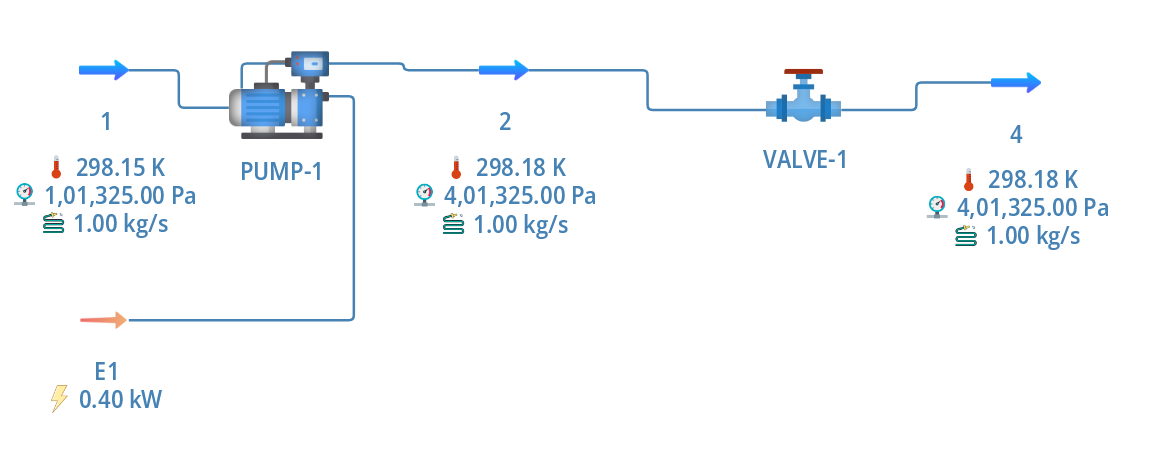

In [4]:
!pip install neqsim

In [12]:
# Import necessary modules from NeqSim
from neqsim.thermo import fluid, TPflash, printFrame
from neqsim.process import clearProcess, stream, runProcess, pump, valve

# Step 1: Create a pure water fluid using the IAPWS-95 (steam tables) thermodynamic package
fluid1 = fluid("IAPWS-95")  # Using IAPWS-95 steam tables
fluid1.addComponent("water", 1.0)  # Add 1 mole of water
fluid1.setTemperature(298.15, "K")  # Temperature in K (25°C)
fluid1.setPressure(101325, "Pa")  # Pressure in Pa (1 atm)
fluid1.setTotalFlowRate(3600.0, "kg/hr")  # Flow rate in kg/hr

# Step 2: Clear any existing processes and create a stream for the fluid
clearProcess()  # Clear any prior process setups
stream1 = stream(fluid1)

# Step 3: Add a pump to pressurize the stream
pump1 = pump(stream1)
pump1.setOutletPressure(300000, "Pa")  # Set the outlet pressure to 300000 Pa (3 bar)
pump1.setIsentropicEfficiency(0.75)  # Isentropic efficiency 75%

# Step 4: Run the process to simulate the pump operation
runProcess()
print("After pump: ")
print("Temperature out of pump: ", pump1.getOutStream().getTemperature("C"), " °C")
print("Pressure out of pump: ", pump1.getOutStream().getPressure("Pa"), " Pa")
print("Pump power: ", pump1.getPower() / 1e3, " kW")  # Pump power in kW

# Step 5: Add a valve to depressurize the stream back to atmospheric pressure
valve1 = valve(pump1.getOutStream())  # Use the pump's output stream as input to the valve
valve1.setOutletPressure(101325, "Pa")  # Set the valve's outlet pressure to 101325 Pa (1 atm)

# Step 6: Run the process to simulate the valve operation
runProcess()
print("\nAfter valve: ")
print("Temperature out of valve: ", valve1.getOutStream().getTemperature("C"), " °C")
print("Pressure out of valve: ", valve1.getOutStream().getPressure("Pa"), " Pa")
print("Flow rate out of valve: ", valve1.getOutStream().getFlowRate("kg/sec"), " kg/s")

# Final stream composition and thermodynamic properties
print("\nFinal stream thermodynamic properties:")
printFrame(valve1.getOutStream().getFluid())


After pump: 
Temperature out of pump:  25.029584131148397  °C
Pressure out of pump:  300000.0  Pa
Pump power:  0.3502447948646732  kW

After valve: 
Temperature out of valve:  25.072802335179063  °C
Pressure out of valve:  101324.99999999999  Pa
Flow rate out of valve:  1.0  kg/s

Final stream thermodynamic properties:
| 0                    | 1          | 2                  | 3   | 4   | 5   | 6               |
|:---------------------|:-----------|:-------------------|:----|:----|:----|:----------------|
|                      | total      | AQUEOUS            |     |     |     |                 |
| water                | 1E0        | 1E0                |     |     |     | [mole fraction] |
|                      |            |                    |     |     |     |                 |
| Density              |            | 1.00166E3          |     |     |     | kg/m3           |
| Phase Fraction       |            | 1E0                |     |     |     | [mole fraction] |
| Molar Mass  